In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import mediapipe as mp
import time

In [3]:
# cap = cv2.VideoCapture(0)
# while cap.isOpened():

#     #read feed
#     ret, frame = cap.read()

#     #show to screen
#     cv2.imshow('OpenCV Feed' , frame)
#     if cv2.waitKey(10) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

#webcam can be excessed

# using MP Holistic

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
mp.solutions.drawing_utils??

Type:        module
String form: <module 'mediapipe.python.solutions.drawing_utils' from 'C:\\Users\\ritti\\anaconda3\\Lib\\site-packages\\mediapipe\\python\\solutions\\drawing_utils.py'>
File:        c:\users\ritti\anaconda3\lib\site-packages\mediapipe\python\solutions\drawing_utils.py
Source:     
# Copyright 2020 The MediaPipe Authors.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
"""MediaPipe solution drawing utils."""

import dataclasses
import math
from typing import List, Mapping, Option

In [47]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image.flags.writeable = False #image is no longer writeable
    results = model.process(image)
    image.flags.writeable = True  #image is now writeable
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image, results

In [48]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [49]:
def draw_styled_landmarks(image, results):
    #color landmark,color the connection
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1,circle_radius=1)
                             )
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=1,circle_radius=1)
                             )
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=1,circle_radius=1)
                             )
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=1,circle_radius=1)
                             )

In [50]:
mp_holistic.FACEMESH_CONTOURS
#it shows one landmark connection to other landmark

frozenset({(0, 267),
           (7, 163),
           (10, 338),
           (13, 312),
           (14, 317),
           (17, 314),
           (21, 54),
           (33, 7),
           (33, 246),
           (37, 0),
           (39, 37),
           (40, 39),
           (46, 53),
           (52, 65),
           (53, 52),
           (54, 103),
           (58, 132),
           (61, 146),
           (61, 185),
           (63, 105),
           (65, 55),
           (66, 107),
           (67, 109),
           (70, 63),
           (78, 95),
           (78, 191),
           (80, 81),
           (81, 82),
           (82, 13),
           (84, 17),
           (87, 14),
           (88, 178),
           (91, 181),
           (93, 234),
           (95, 88),
           (103, 67),
           (105, 66),
           (109, 10),
           (127, 162),
           (132, 93),
           (136, 172),
           (144, 145),
           (145, 153),
           (146, 91),
           (148, 176),
           (149, 150),
   

In [9]:
cap = cv2.VideoCapture(0)
#excess mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
    
        #read feed
        ret, frame = cap.read()

        #make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        #draw landmarks
        draw_styled_landmarks(image, results)

        
        #show to screen
        cv2.imshow('OpenCV Feed' , image)

        #break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [10]:
results

mediapipe.python.solution_base.SolutionOutputs

In [11]:
len(results.face_landmarks.landmark)

468

In [12]:
len(results.pose_landmarks.landmark)

33

In [13]:
len(results.left_hand_landmarks.landmark)#error as we have not shown left hand in video

21

In [14]:
draw_landmarks(frame, results)

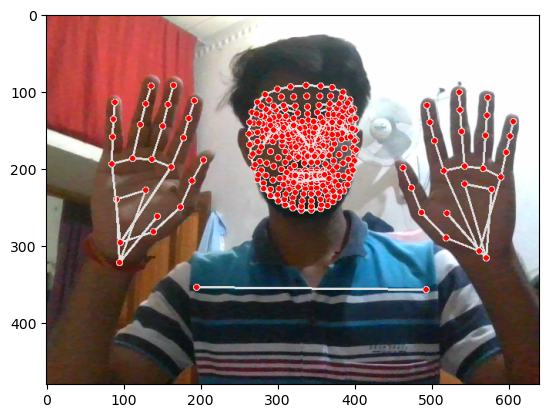

In [15]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# Extract Ketpoint Values

In [16]:
results.pose_landmarks

landmark {
  x: 0.53834987
  y: 0.36741212
  z: -1.1074064
  visibility: 0.9999944
}
landmark {
  x: 0.56235945
  y: 0.29357058
  z: -1.0172006
  visibility: 0.9999775
}
landmark {
  x: 0.58034
  y: 0.29317677
  z: -1.0168579
  visibility: 0.9999814
}
landmark {
  x: 0.59628075
  y: 0.29341605
  z: -1.0160286
  visibility: 0.99997157
}
landmark {
  x: 0.5030998
  y: 0.3020606
  z: -0.9964056
  visibility: 0.99997634
}
landmark {
  x: 0.48201528
  y: 0.30708066
  z: -0.99626577
  visibility: 0.99998283
}
landmark {
  x: 0.4616665
  y: 0.31341812
  z: -0.9961314
  visibility: 0.9999776
}
landmark {
  x: 0.61830956
  y: 0.33285195
  z: -0.5417212
  visibility: 0.9999845
}
landmark {
  x: 0.43598372
  y: 0.35857284
  z: -0.43141252
  visibility: 0.99998873
}
landmark {
  x: 0.57370824
  y: 0.4447678
  z: -0.9445942
  visibility: 0.99998707
}
landmark {
  x: 0.50253105
  y: 0.454192
  z: -0.91635716
  visibility: 0.999986
}
landmark {
  x: 0.7712844
  y: 0.74427575
  z: -0.34158313
  visibi

In [17]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [18]:
pose[0]

array([ 0.53834987,  0.36741212, -1.10740638,  0.9999944 ])

In [19]:
len(results.right_hand_landmarks.landmark)

21

concatenate these value of result in numpy array if we 
don't have value at at that point of time just create 
numpy zeros array with the same shape

In [20]:
pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten()  if results.pose_landmarks else np.zero(33*4)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [51]:
def extract_keypoints(results):
    pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten()  if results.pose_landmarks else np.zero(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [22]:
result_test=extract_keypoints(results)

In [23]:
result_test

array([ 0.53834987,  0.36741212, -1.10740638, ...,  0.13911158,
        0.23950014, -0.04288064])

In [24]:
len(result_test)==33*4+468*3+21*3+21*3

True

a key difference between action detection and other computer vision task is that a sequence of data rather than a single frame is used  for detection

In [25]:
np.save('0',result_test)

In [26]:
np.load('0.npy')

array([ 0.51088917,  0.55465525, -0.82934695, ...,  0.16105461,
        0.41558275, -0.04592407])

# Setup Folder for Collection

In [10]:
# path for export data, numpy array
DATA_PATH = os.path.join('MP_Data')

#Actions what we try to detect
actions = np.array(['Hello','Thanks','ILoveU'])

#thirty videos
no_sequences = 30
#videos are going to be 30 frames in length
sequence_length=30

In [11]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))#This effectively creates a directory structure like DATA_PATH/action/sequence.
        except:
            pass#If the directory already exists, it simply moves to the next combination without raising an exception

# Collect Keypoint Values for Training and Testing

In [31]:
cap = cv2.VideoCapture(0)
#excess mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                
                #read feed
                ret, frame = cap.read()
        
                #make detections
                image, results = mediapipe_detection(frame, holistic)
                print(results)
        
                #draw landmarks
                draw_styled_landmarks(image, results)
        
                #apply wait logic
                if frame_num==0:
                    #styling 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)#wait for 2sec

                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                #show to screen
                cv2.imshow('OpenCV Feed' , image)

                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                np.save(npy_path,keypoints)
        
                #break
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

#  Preprocess Data and Create Labels and Features

In [21]:
#use after training 1st time so that recollection of data for training be avoided

#Actions what we try to detect
actions = np.array(['Hello','Thanks','ILoveU'])
#thirty videos
no_sequences = 30
#videos are going to be 30 frames in length
sequence_length=30
DATA_PATH='C:\\Users\\ritti\\Deep Learning\\MP_Data'

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [23]:
label_map = {label:num for num, label in enumerate(actions)}

In [24]:
label_map

{'Hello': 0, 'Thanks': 1, 'ILoveU': 2}

In [25]:
sequences,labels=[],[]

for action in actions:
    for sequence in range(no_sequences):
        window=[]
        for frame_num in range(sequence_length):
            res=np.load(os.path.join(DATA_PATH,action,str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [26]:
np.array(sequences).shape

(90, 30, 1662)

In [27]:
np.array(labels).shape

(90,)

In [28]:
X=np.array(sequences)

In [29]:
y=to_categorical(labels).astype(int)

In [30]:
y[0:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [32]:
X_train.shape,X_test.shape,y_test.shape

((85, 30, 1662), (5, 30, 1662), (5, 3))

# Build and Train LSTM Neural Network

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
# from tensorflow.keras.callbacks import TensorBoard

In [14]:
actions,actions.shape[0]

(array(['Hello', 'Thanks', 'ILoveU'], dtype='<U6'), 3)

In [15]:
model=Sequential()
model.add(LSTM(64,return_sequences=True,activation='relu',input_shape=(30,1662)))
model.add(LSTM(128,return_sequences=True,activation='relu'))
model.add(LSTM(64,return_sequences=False,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(actions.shape[0],activation='softmax'))

C:\Users\ritti\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=2000)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - categorical_accuracy: 0.4344 - loss: 1.5610
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.3131 - loss: 1.1507
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.2740 - loss: 1.1626
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.2819 - loss: 1.1229
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 0.3738 - loss: 1.0916
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.3601 - loss: 1.0736
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - categorical_accuracy: 0.3054 - loss: 1.0921
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 0.3582 - loss: 0.9839
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.5988 - loss: 0.8108
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.6789 - loss: 0.6770
Epoch 11/2000
3/3 ━━━━━━━━━━━

# Save Weight

In [ ]:
model.save('action.h5')

In [ ]:
del model #deletes the model object from memory(optional)

In [33]:
model.load_weights('action.h5')

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │         442,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 596,675 (2.28 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.get_weights()

[array([[-0.04267161, -0.03184144, -0.01176495, ...,  0.04361674,
         -0.04006024, -0.01556201],
        [ 0.03701856,  0.00668308, -0.0502037 , ..., -0.04982059,
          0.01255533,  0.04488491],
        [ 0.0542635 , -0.0351709 , -0.01355373, ...,  0.0419517 ,
         -0.01166852,  0.01287688],
        ...,
        [-0.01859418, -0.00739746,  0.03558539, ...,  0.02503932,
         -0.01621874,  0.0421944 ],
        [ 0.01606281,  0.03706853, -0.00902923, ..., -0.00474782,
         -0.05223613,  0.01694045],
        [ 0.04912609,  0.00306591, -0.05214015, ..., -0.00433254,
          0.00075247,  0.01831303]], dtype=float32),
 array([[-0.06368082, -0.02623469,  0.07051197, ...,  0.00630487,
         -0.04652545, -0.00370568],
        [ 0.01849874,  0.0008919 , -0.02216503, ..., -0.00593445,
         -0.01764325, -0.04951176],
        [-0.02395828,  0.04099695,  0.10127667, ..., -0.05761623,
         -0.01851523,  0.00520843],
        ...,
        [ 0.00596107, -0.00468753, -0.0

# Predictions

In [36]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


In [37]:
len(res)

5

In [38]:
pred=np.argmax(res[2])
actions[pred],actions[np.argmax(y_test[2])]

('Thanks', 'Thanks')

# Evaluation

In [39]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [40]:
yhat = model.predict(X_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step 


In [41]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [42]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[52,  5],
        [14, 14]],

       [[56,  1],
        [ 0, 28]],

       [[42, 14],
        [ 6, 23]]], dtype=int64)

In [43]:
accuracy_score(ytrue, yhat)

0.7647058823529411

# Test in Real Time

In [44]:
from scipy import stats

colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [46]:
cap.release()
cv2.destroyAllWindows()